## Analyse jährliche CO2-Emission
Gruppe: Jessica Itulah, Michelle Assadi, Medhani Kathirkamanathan

Fragestellung:

Welche Unterschiede und Trends lassen sich in den CO₂-Emissionen pro Kopf ausgewählter Länder über den Zeitraum 2000–2024 identifizieren, und welche Faktoren könnten diese Entwicklungen beeinflusst haben?

Quellen

https://ourworldindata.org/grapher/annual-co2-emissions-per-country
 

## 1. Daten beschaffen und laden

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('annual-co2-emissions-per-country.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','CO2-Emission (Tonnen)']) 
df.head() 

,Gebiet,Code,Jahr,CO2-Emission (Tonnen)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## 2. Daten vorbereiten

In [4]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='CO2-Emission (Tonnen)')
df_pivot.head()

Jahr,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9384400.0,8605932.0,9311054.0,10191504.0,10400110.0,11118626.0,9868841.0,10169889.0,10516319.0,10825998.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4712144.0,4555035.0,5343792.0,5194860.0,4940528.0,4865033.0,5137011.0,4498282.0,4417333.0,4444448.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160321620.0,158308320.0,165251630.0,174461180.0,182425000.0,171138530.0,182035800.0,192778560.0,202846660.0,198203180.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,465328.0,472656.0,472656.0,498304.0,490976.0,377392.0,414032.0,423408.0,418098.0,424663.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27505228.0,25465634.0,23600984.0,23278050.0,22210076.0,16549341.0,19218562.0,21089004.0,21674816.0,22333584.0


## 3. Statistik der Roh-Daten

In [5]:
df.dtypes

Gebiet                    object
Code                      object
Jahr                       int64
CO2-Emission (Tonnen)    float64
dtype: object

### 3.1 Analyse Gebiete

In [6]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  214


In [7]:
df['Gebiet'].value_counts()

Gebiet
Norway                  275
Australia               275
United Kingdom          275
New Zealand             275
Taiwan                  275
                       ... 
Namibia                  34
Marshall Islands         33
Micronesia (country)     33
East Timor               31
Kosovo                   31
Name: count, Length: 214, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

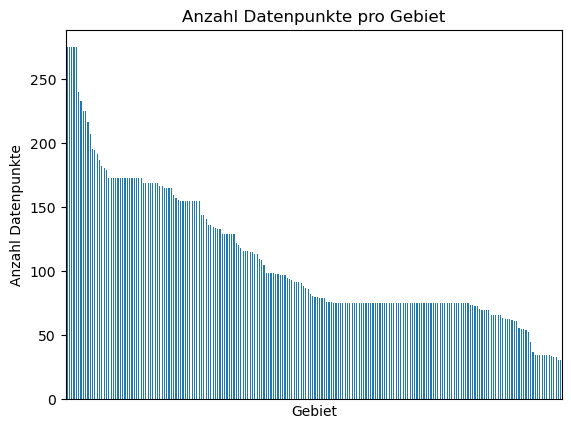

In [8]:
df['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [9]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  214


In [10]:
df['Code'].value_counts()

Code
NOR         275
AUS         275
GBR         275
NZL         275
TWN         275
           ... 
NAM          34
MHL          33
FSM          33
TLS          31
OWID_KOS     31
Name: count, Length: 214, dtype: int64

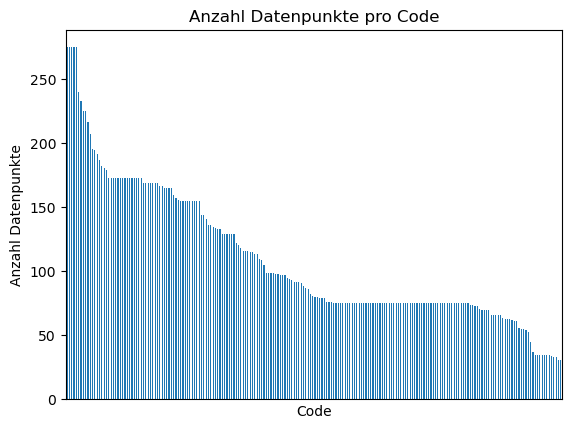

In [11]:
df['Code'].value_counts().plot(kind='bar' ,xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [12]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  275


In [13]:
df['Jahr'].value_counts().sort_index()

Jahr
1750      5
1751      5
1752      5
1753      5
1754      5
       ... 
2020    214
2021    214
2022    214
2023    214
2024    214
Name: count, Length: 275, dtype: int64

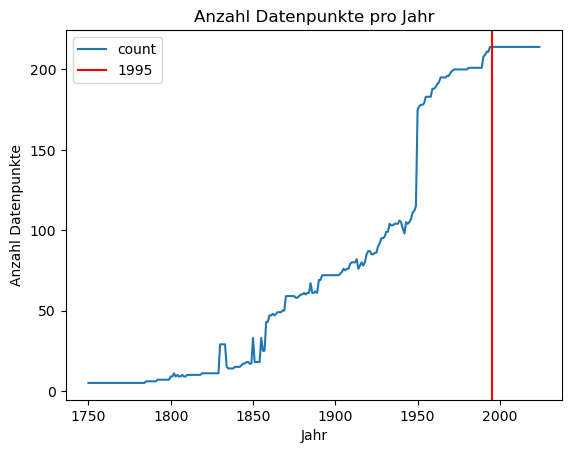

In [28]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1995, color='red',label='1995')
g.legend()

### 3.4 Analyse CO2-Emission

In [15]:
df.describe()

,Jahr,CO2-Emission (Tonnen)
count,23356.000000,2.335600e+04
mean,1956.565508,7.720689e+07
std,52.458529,4.379736e+08
min,1750.000000,0.000000e+00
25%,1927.000000,2.701218e+05
50%,1968.000000,2.824004e+06
75%,1997.000000,2.284310e+07
max,2024.000000,1.228904e+10


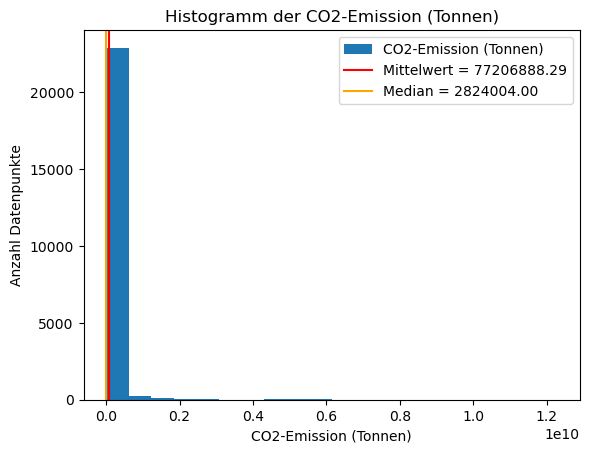

In [16]:
g = df['CO2-Emission (Tonnen)'].plot(kind='hist', bins=20, title='Histogramm der CO2-Emission (Tonnen)',
                           xlabel='CO2-Emission (Tonnen)', ylabel='Anzahl Datenpunkte')
mean = df['CO2-Emission (Tonnen)'].mean()
g.axvline(x=df['CO2-Emission (Tonnen)'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')
 
median = df['CO2-Emission (Tonnen)'].median()
g.axvline(x=df['CO2-Emission (Tonnen)'].median(), color='orange',label=  f'Median = {median:.2f}')
 
g.legend()

## 4. Analyse

### Vorgehen

### Beobachtungen

### Interpretation


### Berechnungen

In [17]:
diffs = df_pivot[2024]-df_pivot[2000]   
diffs = diffs.sort_values().dropna()  
diffs

Gebiet
United States    -1.119038e+09
Germany          -3.266566e+08
Japan            -2.983357e+08
United Kingdom   -2.561281e+08
Italy            -1.676685e+08
                      ...     
Saudi Arabia      3.824944e+08
Iran              4.254179e+08
Indonesia         5.311658e+08
India             2.206413e+09
China             8.645228e+09
Length: 214, dtype: float64

<Axes: title={'center': 'Grösste 5 Differenzen der CO-2 Emission'}, ylabel='Gebiet'>

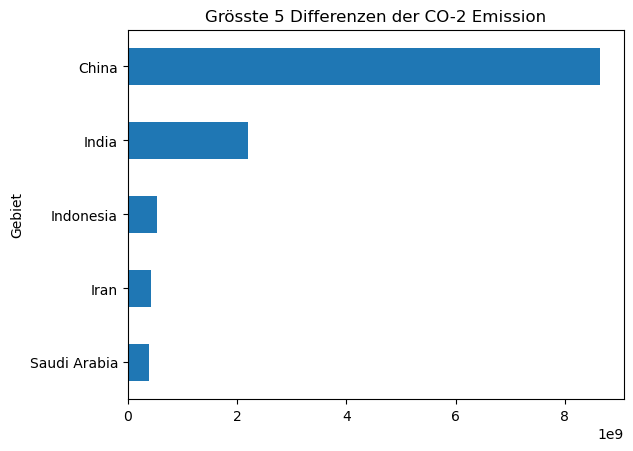

In [18]:
diff_sel = (diffs > 3.5e8)
diffs[diff_sel].plot(kind='barh', title='Grösste 5 Differenzen der CO-2 Emission') #Einheit auf x-Achse

In [19]:
Gebiets_liste = diffs[diff_sel].nlargest(5).index.tolist()
print(Gebiets_liste)


['China', 'India', 'Indonesia', 'Iran', 'Saudi Arabia']


### Visualisierung

In [20]:
#start_year = base_year = df_pivot.index.min()
#df_norm = df_pivot.div(df_pivot.loc[base_year]).mul(100)
#df_norm

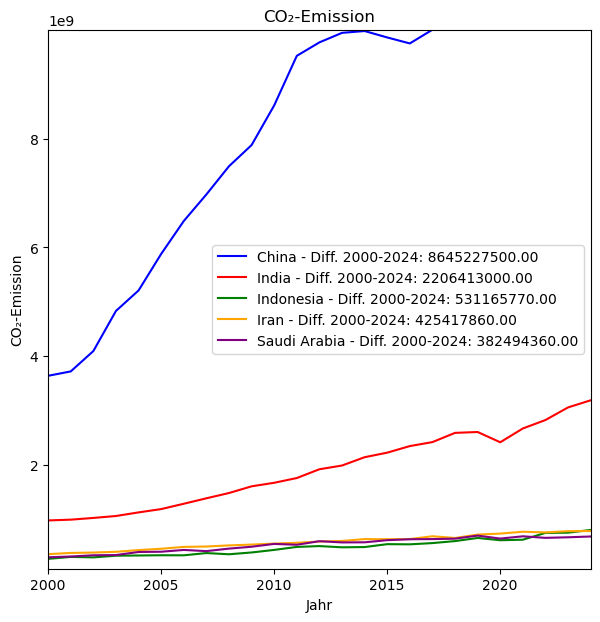

In [68]:
color_dict = {
    'China': 'blue',
    'India': 'red',
    'Indonesia': 'green',
    'Iran': 'orange',
    'Saudi Arabia': 'purple'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='CO₂-Emission', xlabel='Jahr', ylabel=f'CO₂-Emission', legend=True,
                                  label=f'{gebiet} - Diff. 2000-2024: {diff:.2f}',
                                  xlim=[2000,2024], ylim=[100000000,9999999999], 
                                  color=color_dict[gebiet],        
                                  figsize=(7,7))                   



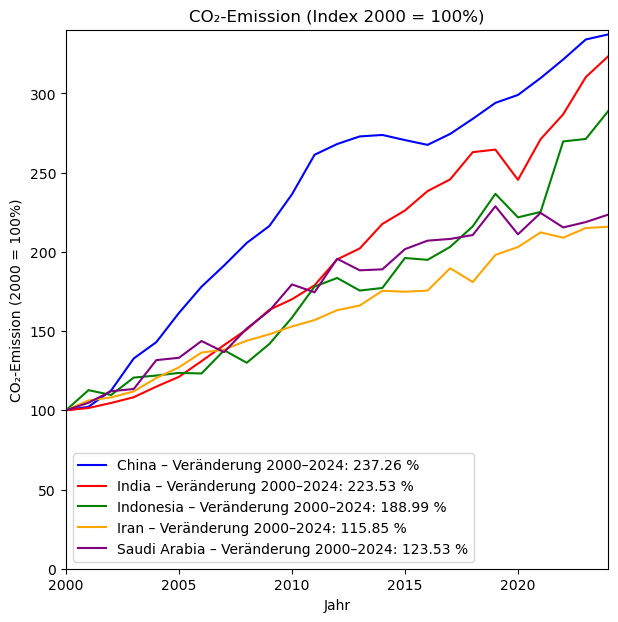

In [69]:
color_dict = {
    'China': 'blue',
    'India': 'red',
    'Indonesia': 'green',
    'Iran': 'orange',
    'Saudi Arabia': 'purple'
}

for gebiet in Gebiets_liste:
    # Zeitreihe des Landes
    serie = df_pivot.loc[gebiet]

    # Normierung auf Startjahr 2000 = 100 %
    serie_norm = serie / serie.loc[2000] * 100

    diff = serie_norm.loc[2024] - 100

    g = serie_norm.plot(
        title='CO₂-Emission (Index 2000 = 100%)',
        xlabel='Jahr',
        ylabel='CO₂-Emission (2000 = 100%)',
        legend=True,
        label=f'{gebiet} – Veränderung 2000–2024: {diff:.2f} %',
        xlim=[2000, 2024],
        ylim=[0, serie_norm.max() * 1.05+100],
        color=color_dict[gebiet],
        figsize=(7, 7)
    )


In [ ]:
diffs = diffs.sort_values(ascending= False)
top5_laender = diffs.head(5).index.tolist()
df_selected = diffs.loc[top5_laender]

total = diffs.values.sum()
#pd.DataFrame(df_selected, columns=[])
values = df_selected.values
index = df_selected.index
C = pd.DataFrame(data = index)
C["CO^2"] = values
C # C umbenennen
C["%"] = C["CO^2"]/total *100
C


,Gebiet,CO^2,%
0,China,8.645228e+09,68.189952
1,India,2.206413e+09,17.403266
2,Indonesia,5.311658e+08,4.189614
3,Iran,4.254179e+08,3.355519
4,Saudi Arabia,3.824944e+08,3.016956


In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

df_norm = df_prozent.div(df_prozent.iloc[:, 1], axis=0) * 100

#for land in df_norm.index:
for land in df_norm.iloc[:,0]:
    plt.plot(df_norm.iloc.columns, df_norm.loc[land], label=land)

plt.xlabel("Jahr")
plt.ylabel("CO2-Emission (Startjahr = 100%)")
plt.title("Entwicklung CO2-Emission der Top 5 Länder")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'float'

<Figure size 700x700 with 0 Axes>

In [ ]:
df_selected

Gebiet
United States    -1.119038e+09
Germany          -3.266566e+08
Japan            -2.983357e+08
United Kingdom   -2.561281e+08
Italy            -1.676685e+08
dtype: float64

In [ ]:
top5_laender = diffs.head(5).index.tolist()
df_selected = diffs.loc[top5_laender]

plt.figure(figsize=(7,7))
diff

#df_norm = df_selected.div(df_selected.iloc[:, 0], axis=0) * 100



np.float64(382494360.0)

<Figure size 700x700 with 0 Axes>

In [ ]:
type(df_selected) #<-------------------------------------- variable undefiniert

pandas.core.series.Series